In [5]:
import requests
import gc
gc.collect()
import pandas as pd
import requests
import torch
print(torch.cuda.is_available())
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_產品.csv',index_col=0)
print(df.shape)
df

True
(11571, 6)


,string_X_train,Y_label,EXPNO,from,string_Y_1,string_Y_2
0,SHIPMENT OFPVC SUSPENSION RESIN S65D QTY 18 MT...,PVC MASS RESIN B57,NaN,20210103.xlsx,81,99
2,TERMS OF SALE CIF NHAVA SHEVA PORT INDIA70 MT ...,PVC RESIN S60,NaN,20210103.xlsx,50,63
3,MASS PVC RESIN B57 QUANTITY 175 MT AT 1300 US...,PVC RESIN B57,11,20210103.xlsx,6,19
4,PHTHALIC ANHYDRIDE PAQUANTITY 306 MT UNIT P...,PHTHALIC ANHYDRIDE,27,20210103.xlsx,1,19
5,COMMODITY LLDPE TAISOX 3470 QUANTITY 320MT 2...,TAISOX 3470,18,20210103.xlsx,17,28
...,...,...,...,...,...,...
20732,PVC SUSPENSION RESIN S65D FOR 70MT AT USD 12...,PVC SUSPENSION RESIN,NaN,20200712.xlsx,1,21
20733,7000 MT IN 4X20 FT CONTAINERS PVC RESIN S60 AS...,PVC RESIN S60,11,20200712.xlsx,30,43
20734,EPOXY RESIN NPEF178FOB ANY PORT OF TAIWAN,EPOXY RESIN,NaN,20200712.xlsx,1,12
20735,EPOXY RESIN NPEL128CIF SAVANNAH GA,EPOXY RESIN,NaN,20200712.xlsx,1,12


In [6]:
# 把國家名稱剃除 品名不能有國家
for i in ['TAIWAN','JAPAN','CHINA','AMERICA','INDIA']:
    print(df['Y_label'].str.contains(i).sum())
    print(df['Y_label'].str.contains(i.lower()).sum())

0
0
0
0
0
0
0
0
0
0


Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should pr


epoch:0 train_loss:0.33780780027555135 val_loss:0.13595897340368612
save best_model now_val_best_loss is:0.13595897340368612



epoch:1 train_loss:0.3363317700710707 val_loss:0.23970624987196312



epoch:2 train_loss:0.2335204759520981 val_loss:0.20049287367509



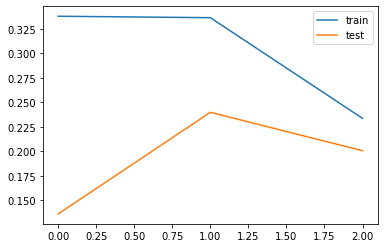

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

In [7]:
# 切分訓練/驗證
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
# 執行訓練演算法
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/2b751c959a1b48a14e627eaf956f9ae3df821f46/bert_train_pipeline.py'
exec(requests.get(url).text)
qustion = 'What is the product name?'
model_path = '../models/Product_Data_SQuAD_model_product.pt'
res,table = bert_train_pipeline(train_df,val_df,qustion,model_path)

In [8]:
# 模型表現
display(res)
table.sample(10)

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.9584,0.933909,0.933909,0.968898,0.988769


,Y_label,predict,是否全對
1916,GLASS EPOXY PREPREG,GLASS EPOXY PREPREG,Yes
16846,BISPHENOLA,BISPHENOLA,Yes
16805,GRADE,GRADE,Yes
14923,YARN,GRADE,No
3520,SUPER ABSORBENT POLYMER,SUPER ABSORBENT POLYMER,Yes
6566,EPOXY RESIN,EPOXY RESIN,Yes
8353,YARN,YARN,Yes
20522,PROPYLENE COPOLYMER,PROPYLENE COPOLYMER,Yes
20024,GRADE,GRADE,Yes
5816,PHTHALIC ANHYDRIDE,PHTHALIC ANHYDRIDE,Yes
